<a href="https://colab.research.google.com/github/sssylvia0/Uplift_Model/blob/main/Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

結果資料整理

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

##Round1

In [18]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/11月外匯名單_成效追蹤.csv', usecols=usecols)
v = df.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
df.drop_duplicates(subset = 'UNINO', inplace = True)
df = pd.merge(df.loc[:, df.columns != 'TOTALNTAMOUNT'], v, on='UNINO', how='left')
df

,UNINO,標籤,TAG,發送名單,TOTALNTAMOUNT
0,A1220046320,NaN,數位通路_換匯名單_F群_未發,0,0.0
1,A1221949610,數位通路_換匯名單_F群,NaN,1,0.0
2,A1224193120,數位通路_換匯名單_G群,NaN,1,0.0
3,A1228308980,數位通路_換匯名單_G群,NaN,1,0.0
4,A1228865070,數位通路_換匯名單_F群,NaN,1,0.0
...,...,...,...,...,...
103919,Y2725958190,數位通路_換匯名單_C群,NaN,1,0.0
103920,Y2727395520,NaN,數位通路_換匯名單_F群_未發,0,0.0
103921,Y2727650750,數位通路_換匯名單_F群,NaN,0,0.0
103922,Z1222922330,數位通路_換匯名單_G群,NaN,0,0.0


In [19]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-19-92a5edbb0bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-19-92a5edbb0bd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-19-92a5edbb0bd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1220046320,數位通路_換匯名單_F群_未發,0,0,0.0
1,A1221949610,數位通路_換匯名單_F群,1,1,0.0
2,A1224193120,數位通路_換匯名單_G群,1,1,0.0
3,A1228308980,數位通路_換匯名單_G群,1,1,0.0
4,A1228865070,數位通路_換匯名單_F群,1,1,0.0
...,...,...,...,...,...
103703,Y2725958190,數位通路_換匯名單_C群,1,1,0.0
103704,Y2727395520,數位通路_換匯名單_F群_未發,0,0,0.0
103705,Y2727650750,數位通路_換匯名單_F群,1,0,0.0
103706,Z1222922330,數位通路_換匯名單_G群,1,0,0.0


In [20]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 1
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1220046320,0,0,0.0,1,0,1,1
1,A1221949610,1,1,0.0,1,0,1,1
2,A1224193120,1,1,0.0,1,1,1,1
3,A1228308980,1,1,0.0,1,1,1,1
4,A1228865070,1,1,0.0,1,0,1,1
...,...,...,...,...,...,...,...,...
103703,Y2725958190,1,1,0.0,0,0,1,1
103704,Y2727395520,0,0,0.0,1,0,1,1
103705,Y2727650750,1,0,0.0,1,0,1,1
103706,Z1222922330,1,0,0.0,1,1,1,1


In [21]:
(df_new['TOTALNTAMOUNT'] != 0).sum()

2298

In [22]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T = 0', 'Uplift_mean|T = 1', 'X_te_2', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202308_new.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1220046320,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823
1,A1221949610,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875
2,A1224193120,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594
3,A1228308980,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364
4,A1228865070,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806
...,...,...,...,...,...,...,...
103703,Y2725958190,0.007029,0.031847,0.004010,1656.168757,6539.039792,5027.934584
103704,Y2727395520,0.005046,0.030175,0.007685,686.915001,3642.971152,896.318976
103705,Y2727650750,0.005525,0.036715,0.008507,597.599400,3363.202331,1121.475990
103706,Z1222922330,0.005011,0.035214,0.035122,591.849539,3213.288381,974.855341


In [23]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202308_v1.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [24]:
#Feature X
X = pd.read_csv('/content/data202308_v1.csv', index_col=0)
#X[['換匯發送名單','TOTALNTAMOUNT', '跨售行為']]
# Create new DataFrame with the new columns inserted
insert_index = X.columns.get_loc('換匯基因標籤')+1
X.insert(insert_index, "近三個月是否發送過其他名單", [0] * len(X))
X.insert(insert_index, "外匯交易金額_近三個月", [0] * len(X))
X.insert(insert_index, "近三個月是否發送過外匯名單", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1220046320,73,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,A1221949610,75,0,1.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,1
2,A1224193120,71,0,1.0,0,1500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
3,A1228308980,87,0,1.0,0,4500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
4,A1228865070,73,0,1.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103703,Y2725958190,56,0,2.0,0,1000.0,1,2,0,3,...,0,0,0,1,0,0,0,1,0,1
103704,Y2727395520,64,0,2.0,0,120.0,1,2,0,3,...,0,0,0,1,0,0,0,1,0,1
103705,Y2727650750,51,0,2.0,0,648.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
103706,Z1222922330,46,0,1.0,0,641.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0


In [25]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103703,Y2725958190,1,0,0,1,1,1,56,0,2.0,...,1,0,1,0.007029,0.031847,0.004010,1656.168757,6539.039792,5027.934584,0.0
103704,Y2727395520,1,1,0,1,0,0,64,0,2.0,...,1,0,1,0.005046,0.030175,0.007685,686.915001,3642.971152,896.318976,0.0
103705,Y2727650750,1,1,0,1,0,1,51,0,2.0,...,1,0,1,0.005525,0.036715,0.008507,597.599400,3363.202331,1121.475990,0.0
103706,Z1222922330,1,1,1,1,0,1,46,0,1.0,...,1,0,0,0.005011,0.035214,0.035122,591.849539,3213.288381,974.855341,0.0


In [26]:
#儲存結果
#Round1 103708 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

In [27]:
del Concat

## Round2

In [34]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/12月外匯名單_成效追蹤_人.csv', usecols=usecols)
v = df.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
df.drop_duplicates(subset = 'UNINO', inplace = True)
df = pd.merge(df.loc[:, df.columns != 'TOTALNTAMOUNT'], v, on='UNINO', how='left')
df

,UNINO,標籤,TAG,發送名單,TOTALNTAMOUNT
0,A1422511920,NaN,數位通路_換匯名單_B群_未發,0,0.0
1,A1520164620,數位通路_換匯名單_F群,NaN,1,0.0
2,A1520193310,數位通路_換匯名單_B群,NaN,1,0.0
3,A1520212860,數位通路_換匯名單_B群,NaN,0,0.0
4,A1520293310,數位通路_換匯名單_G群,NaN,1,0.0
...,...,...,...,...,...
103831,Z1222213310,NaN,數位通路_換匯名單_F群_未發,0,0.0
103832,Z1222291870,數位通路_換匯名單_G群,NaN,1,0.0
103833,Z1229902750,NaN,數位通路_換匯名單_F群_未發,0,0.0
103834,Z2222847680,數位通路_換匯名單_A群,NaN,0,0.0


In [35]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-35-92a5edbb0bd0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-35-92a5edbb0bd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-35-92a5edbb0bd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1422511920,數位通路_換匯名單_B群_未發,0,0,0.0
1,A1520164620,數位通路_換匯名單_F群,1,1,0.0
2,A1520193310,數位通路_換匯名單_B群,1,1,0.0
3,A1520212860,數位通路_換匯名單_B群,1,0,0.0
4,A1520293310,數位通路_換匯名單_G群,1,1,0.0
...,...,...,...,...,...
103831,Z1222213310,數位通路_換匯名單_F群_未發,0,0,0.0
103832,Z1222291870,數位通路_換匯名單_G群,1,1,0.0
103833,Z1229902750,數位通路_換匯名單_F群_未發,0,0,0.0
103834,Z2222847680,數位通路_換匯名單_A群,1,0,0.0


In [36]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 2
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1422511920,0,0,0.0,0,1,0,2
1,A1520164620,1,1,0.0,1,0,1,2
2,A1520193310,1,1,0.0,0,1,0,2
3,A1520212860,1,0,0.0,0,1,0,2
4,A1520293310,1,1,0.0,1,1,1,2
...,...,...,...,...,...,...,...,...
103831,Z1222213310,0,0,0.0,1,0,1,2
103832,Z1222291870,1,1,0.0,1,1,1,2
103833,Z1229902750,0,0,0.0,1,0,1,2
103834,Z2222847680,1,0,0.0,1,0,0,2


In [37]:
(df_new['TOTALNTAMOUNT'] != 0).sum()

1737

In [38]:
df_new.TOTALNTAMOUNT.describe()

count    1.038360e+05
mean     1.846254e+03
std      4.074521e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.198300e+06
Name: TOTALNTAMOUNT, dtype: float64

In [39]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te_2', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202311.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1422511920,0.002469,0.038639,0.038356,229.056904,2944.489319,225.430680
1,A1520164620,0.004270,0.030376,0.005584,753.486909,5010.848109,641.320388
2,A1520193310,0.004307,0.037736,0.134711,655.477941,5083.002697,491.199785
3,A1520212860,0.003264,0.043428,0.044687,326.804537,3752.875108,491.868373
4,A1520293310,0.003898,0.041679,0.021649,587.624158,5557.946724,792.429414
...,...,...,...,...,...,...,...
103831,Z1222213310,0.003777,0.038692,0.015470,681.552680,6493.319045,832.677441
103832,Z1222291870,0.003733,0.036496,0.021548,584.537596,5161.128461,777.573578
103833,Z1229902750,0.003889,0.036158,0.007920,612.893865,5113.176412,792.003350
103834,Z2222847680,0.013350,0.029382,0.000530,2176.619632,3948.401576,-1954.572031


In [40]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202311.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [41]:
#Feature X
X = pd.read_csv('/content/data202311.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)

# Create new DataFrame with the new columns inserted
insert_index = X.columns.get_loc('換匯基因標籤')+1
X.insert(insert_index, "近三個月是否發送過其他名單", [0] * len(X))
X.insert(insert_index, "外匯交易金額_近三個月", [0] * len(X))
X.insert(insert_index, "近三個月是否發送過外匯名單", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1422511920,18,0,1.0,0,200.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
1,A1520164620,55,0,1.0,0,720.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
2,A1520193310,26,0,1.0,0,240.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,A1520212860,21,0,1.0,0,0.0,1,3,0,1,...,0,0,0,0,0,1,0,0,0,0
4,A1520293310,22,0,1.0,0,0.0,1,2,0,6,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103831,Z1222213310,53,0,1.0,0,1850.0,1,3,0,3,...,0,1,0,0,0,1,0,0,0,0
103832,Z1222291870,53,0,1.0,0,0.0,1,3,0,3,...,0,0,0,0,0,1,0,0,0,1
103833,Z1229902750,44,0,1.0,0,0.0,1,1,0,3,...,0,0,0,0,0,1,0,0,0,0
103834,Z2222847680,42,0,2.0,0,1295.0,1,2,0,1,...,0,1,0,0,0,1,0,1,0,0


In [42]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1422511920,2,0,1,0,0,0,18,0,1.0,...,1,0,0,0.002469,0.038639,0.038356,229.056904,2944.489319,225.430680,0.0
1,A1520164620,2,1,0,1,1,1,55,0,1.0,...,0,0,0,0.004270,0.030376,0.005584,753.486909,5010.848109,641.320388,0.0
2,A1520193310,2,0,1,0,1,1,26,0,1.0,...,1,0,0,0.004307,0.037736,0.134711,655.477941,5083.002697,491.199785,0.0
3,A1520212860,2,0,1,0,0,1,21,0,1.0,...,0,0,0,0.003264,0.043428,0.044687,326.804537,3752.875108,491.868373,0.0
4,A1520293310,2,1,1,1,1,1,22,0,1.0,...,1,0,0,0.003898,0.041679,0.021649,587.624158,5557.946724,792.429414,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103831,Z1222213310,2,1,0,1,0,0,53,0,1.0,...,0,0,0,0.003777,0.038692,0.015470,681.552680,6493.319045,832.677441,0.0
103832,Z1222291870,2,1,1,1,1,1,53,0,1.0,...,0,0,1,0.003733,0.036496,0.021548,584.537596,5161.128461,777.573578,0.0
103833,Z1229902750,2,1,0,1,0,0,44,0,1.0,...,0,0,0,0.003889,0.036158,0.007920,612.893865,5113.176412,792.003350,0.0
103834,Z2222847680,2,1,0,0,0,1,42,0,2.0,...,1,0,0,0.013350,0.029382,0.000530,2176.619632,3948.401576,-1954.572031,0.0


In [43]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103831,Z1222213310,2,1,0,1,0,0,53,0,1.0,...,0,0,0,0.003777,0.038692,0.015470,681.552680,6493.319045,832.677441,0.0
103832,Z1222291870,2,1,1,1,1,1,53,0,1.0,...,0,0,1,0.003733,0.036496,0.021548,584.537596,5161.128461,777.573578,0.0
103833,Z1229902750,2,1,0,1,0,0,44,0,1.0,...,0,0,0,0.003889,0.036158,0.007920,612.893865,5113.176412,792.003350,0.0
103834,Z2222847680,2,1,0,0,0,1,42,0,2.0,...,1,0,0,0.013350,0.029382,0.000530,2176.619632,3948.401576,-1954.572031,0.0


In [44]:
#儲存結果
#Round1 103708 rows × 218 columns
#Round2 103836 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

## Round3

In [45]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/2月外匯名單_成效追蹤.csv', usecols=usecols)
v = df.groupby('UNINO', as_index=False)['TOTALNTAMOUNT'].sum()
df.drop_duplicates(subset = 'UNINO', inplace = True)
df = pd.merge(df.loc[:, df.columns != 'TOTALNTAMOUNT'], v, on='UNINO', how='left')
df

,UNINO,標籤,TAG,發送名單,TOTALNTAMOUNT
0,A1520047570,數位通路_換匯名單_D群,NaN,1,0.0
1,A1520929950,NaN,數位通路_換匯名單_A群_未發,0,0.0
2,A1521108250,NaN,數位通路_換匯名單_A群_未發,0,0.0
3,A1521565520,數位通路_換匯名單_A群,NaN,1,0.0
4,A1521568210,NaN,數位通路_換匯名單_F群_未發,0,0.0
...,...,...,...,...,...
94717,Z2222152570,數位通路_換匯名單_D群,NaN,1,0.0
94718,Z2222682380,數位通路_換匯名單_A群,NaN,1,0.0
94719,Z2222759400,數位通路_換匯名單_D群,NaN,1,0.0
94720,Z2229768430,數位通路_換匯名單_A群,NaN,0,0.0


In [46]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-46-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-46-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-46-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1520047570,數位通路_換匯名單_D群,1,1,0.0
1,A1520929950,數位通路_換匯名單_A群_未發,0,0,0.0
2,A1521108250,數位通路_換匯名單_A群_未發,0,0,0.0
3,A1521565520,數位通路_換匯名單_A群,1,1,0.0
4,A1521568210,數位通路_換匯名單_F群_未發,0,0,0.0
...,...,...,...,...,...
94672,Z2222152570,數位通路_換匯名單_D群,1,1,0.0
94673,Z2222682380,數位通路_換匯名單_A群,1,1,0.0
94674,Z2222759400,數位通路_換匯名單_D群,1,1,0.0
94675,Z2229768430,數位通路_換匯名單_A群,1,0,0.0


In [47]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 3
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1520047570,1,1,0.0,1,1,0,3
1,A1520929950,0,0,0.0,1,0,0,3
2,A1521108250,0,0,0.0,1,0,0,3
3,A1521565520,1,1,0.0,1,0,0,3
4,A1521568210,0,0,0.0,1,0,1,3
...,...,...,...,...,...,...,...,...
94672,Z2222152570,1,1,0.0,1,1,0,3
94673,Z2222682380,1,1,0.0,1,0,0,3
94674,Z2222759400,1,1,0.0,1,1,0,3
94675,Z2229768430,1,0,0.0,1,0,0,3


In [48]:
(df_new['TOTALNTAMOUNT'] != 0).sum()

938

In [49]:
df_new.TOTALNTAMOUNT.describe()

count    9.467700e+04
mean     9.376196e+02
std      2.450376e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.259969e+06
Name: TOTALNTAMOUNT, dtype: float64

In [50]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202312.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1520047570,0.006851,0.025558,0.006892,5.897677,3.061653,30.031338
1,A1520929950,0.004034,0.024161,0.000414,3.455968,24.080386,17.547861
2,A1521108250,0.009409,0.015378,0.000067,8.233244,-52.010266,20.496719
3,A1521565520,0.006148,0.024971,-0.003043,5.161668,7.870282,18.942218
4,A1521568210,0.003026,0.025071,-0.133527,40.093646,309.242270,15.200123
...,...,...,...,...,...,...,...
94672,Z2222152570,0.005935,0.028588,0.002334,5.211356,9.948299,-44.720300
94673,Z2222682380,0.002568,0.035140,0.000295,2.181298,31.707452,15.149534
94674,Z2222759400,0.003004,0.032034,0.000628,2.585310,91.704449,14.694062
94675,Z2229768430,0.002792,0.031995,0.000300,2.351473,40.299896,14.490674


In [51]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202312.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [52]:
#Feature X
X = pd.read_csv('/content/data202312.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1520047570,23,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1,A1520929950,19,0,1.0,0,500.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
2,A1521108250,23,0,1.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
3,A1521565520,24,0,1.0,0,460.0,1,2,0,1,...,0,1,0,0,0,1,0,1,0,0
4,A1521568210,24,0,1.0,0,500.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2222152570,50,0,2.0,0,0.0,1,2,0,3,...,0,0,0,1,0,0,0,1,0,0
94673,Z2222682380,46,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
94674,Z2222759400,47,0,2.0,0,2000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
94675,Z2229768430,52,0,2.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0


In [53]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1520047570,3,1,1,0,1,1,23,0,1.0,...,1,0,0,0.006851,0.025558,0.006892,5.897677,3.061653,30.031338,0.0
1,A1520929950,3,1,0,0,0,0,19,0,1.0,...,1,0,0,0.004034,0.024161,0.000414,3.455968,24.080386,17.547861,0.0
2,A1521108250,3,1,0,0,0,0,23,0,1.0,...,0,0,0,0.009409,0.015378,0.000067,8.233244,-52.010266,20.496719,0.0
3,A1521565520,3,1,0,0,1,1,24,0,1.0,...,1,0,0,0.006148,0.024971,-0.003043,5.161668,7.870282,18.942218,0.0
4,A1521568210,3,1,0,1,0,0,24,0,1.0,...,1,0,0,0.003026,0.025071,-0.133527,40.093646,309.242270,15.200123,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2222152570,3,1,1,0,1,1,50,0,2.0,...,1,0,0,0.005935,0.028588,0.002334,5.211356,9.948299,-44.720300,0.0
94673,Z2222682380,3,1,0,0,1,1,46,0,2.0,...,0,0,0,0.002568,0.035140,0.000295,2.181298,31.707452,15.149534,0.0
94674,Z2222759400,3,1,1,0,1,1,47,0,2.0,...,1,0,0,0.003004,0.032034,0.000628,2.585310,91.704449,14.694062,0.0
94675,Z2229768430,3,1,0,0,0,1,52,0,2.0,...,1,0,0,0.002792,0.031995,0.000300,2.351473,40.299896,14.490674,0.0


In [54]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94672,Z2222152570,3,1,1,0,1,1,50,0,2.0,...,1,0,0,0.005935,0.028588,0.002334,5.211356,9.948299,-44.720300,0.0
94673,Z2222682380,3,1,0,0,1,1,46,0,2.0,...,0,0,0,0.002568,0.035140,0.000295,2.181298,31.707452,15.149534,0.0
94674,Z2222759400,3,1,1,0,1,1,47,0,2.0,...,1,0,0,0.003004,0.032034,0.000628,2.585310,91.704449,14.694062,0.0
94675,Z2229768430,3,1,0,0,0,1,52,0,2.0,...,1,0,0,0.002792,0.031995,0.000300,2.351473,40.299896,14.490674,0.0


In [55]:
#儲存結果
#Round1 103708 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

In [56]:
del Concat

## Round4

In [57]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/3月外匯名單_成效追蹤.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1022229640,NaN,數位通路_換匯名單_B群,NaN,1
1,A1520044920,10538.0,NaN,數位通路_換匯名單_D群_未發,0
2,A1520160590,NaN,數位通路_換匯名單_G群,NaN,1
3,A1520329360,NaN,數位通路_換匯名單_F群,NaN,1
4,A1520361760,NaN,數位通路_換匯名單_F群,NaN,1
...,...,...,...,...,...
126966,Z2222682380,NaN,數位通路_換匯名單_A群,NaN,1
126967,Z2222759400,NaN,數位通路_換匯名單_G群,NaN,1
126968,Z2222812560,NaN,數位通路_換匯名單_A群,NaN,1
126969,Z2229768430,NaN,數位通路_換匯名單_A群,NaN,0


In [58]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-58-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-58-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-58-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1022229640,數位通路_換匯名單_B群,1,1,0.0
1,A1520044920,數位通路_換匯名單_D群_未發,0,0,10538.0
2,A1520160590,數位通路_換匯名單_G群,1,1,0.0
3,A1520329360,數位通路_換匯名單_F群,1,1,0.0
4,A1520361760,數位通路_換匯名單_F群,1,1,0.0
...,...,...,...,...,...
126730,Z2222682380,數位通路_換匯名單_A群,1,1,0.0
126731,Z2222759400,數位通路_換匯名單_G群,1,1,0.0
126732,Z2222812560,數位通路_換匯名單_A群,1,1,0.0
126733,Z2229768430,數位通路_換匯名單_A群,1,0,0.0


In [59]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 4
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1022229640,1,1,0.0,0,1,0,4
1,A1520044920,0,0,10538.0,1,1,0,4
2,A1520160590,1,1,0.0,1,1,1,4
3,A1520329360,1,1,0.0,1,0,1,4
4,A1520361760,1,1,0.0,1,0,1,4
...,...,...,...,...,...,...,...,...
126730,Z2222682380,1,1,0.0,1,0,0,4
126731,Z2222759400,1,1,0.0,1,1,1,4
126732,Z2222812560,1,1,0.0,1,0,0,4
126733,Z2229768430,1,0,0.0,1,0,0,4


In [60]:
(df_new['TOTALNTAMOUNT'] != 0).sum()

2089

In [61]:
df_new.TOTALNTAMOUNT.describe()

count    1.267350e+05
mean     1.789482e+03
std      4.234890e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.666000e+06
Name: TOTALNTAMOUNT, dtype: float64

In [62]:
#Prediction results
usecols = ['UNINO', 'Uplift_mean|T=0', 'Uplift_mean|T=1', 'X_te', 'E(V)|X,T = 0', 'E(V)|X,T = 1', 'Value_X']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_All_202401.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1022229640,0.001298,0.013586,0.000454,1.124713,9.822238,5.612360
1,A1520044920,0.001540,0.015065,0.016476,17.249263,129.702455,-502.838649
2,A1520160590,0.005336,0.008199,0.002181,4.635691,11.320247,10.547954
3,A1520329360,0.003702,0.007610,0.000165,3.213564,-9.164372,8.413327
4,A1520361760,0.001810,0.010619,0.000010,1.550227,-1.996863,7.038479
...,...,...,...,...,...,...,...
126730,Z2222682380,0.000685,0.017353,0.000295,0.581660,15.107836,5.985754
126731,Z2222759400,0.001871,0.005815,0.000584,1.605834,13.928832,10.359990
126732,Z2222812560,0.001343,0.013980,-0.000336,1.159956,3.080207,6.330513
126733,Z2229768430,0.001268,0.015087,0.000300,1.074129,17.106337,5.468015


In [63]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202401.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [64]:
#Feature X
X = pd.read_csv('/content/data202401.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1022229640,43,0,1.0,0,400.0,1,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,A1520044920,23,0,1.0,0,336.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
2,A1520160590,24,0,1.0,0,20.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
3,A1520329360,55,0,1.0,0,0.0,1,3,0,1,...,0,0,0,1,0,0,0,0,0,0
4,A1520361760,26,0,1.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126730,Z2222682380,46,0,2.0,0,0.0,1,2,0,1,...,0,0,0,1,0,0,0,0,0,0
126731,Z2222759400,47,0,2.0,0,2000.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
126732,Z2222812560,48,0,2.0,0,800.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
126733,Z2229768430,52,0,2.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0


In [65]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1022229640,4,0,1,0,1,1,43,0,1.0,...,0,0,0,0.001298,0.013586,0.000454,1.124713,9.822238,5.612360,0.0
1,A1520044920,4,1,1,0,0,0,23,0,1.0,...,1,0,0,0.001540,0.015065,0.016476,17.249263,129.702455,-502.838649,10538.0
2,A1520160590,4,1,1,1,1,1,24,0,1.0,...,1,0,1,0.005336,0.008199,0.002181,4.635691,11.320247,10.547954,0.0
3,A1520329360,4,1,0,1,1,1,55,0,1.0,...,0,0,0,0.003702,0.007610,0.000165,3.213564,-9.164372,8.413327,0.0
4,A1520361760,4,1,0,1,1,1,26,0,1.0,...,0,0,0,0.001810,0.010619,0.000010,1.550227,-1.996863,7.038479,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126730,Z2222682380,4,1,0,0,1,1,46,0,2.0,...,0,0,0,0.000685,0.017353,0.000295,0.581660,15.107836,5.985754,0.0
126731,Z2222759400,4,1,1,1,1,1,47,0,2.0,...,1,0,0,0.001871,0.005815,0.000584,1.605834,13.928832,10.359990,0.0
126732,Z2222812560,4,1,0,0,1,1,48,0,2.0,...,1,0,0,0.001343,0.013980,-0.000336,1.159956,3.080207,6.330513,0.0
126733,Z2229768430,4,1,0,0,0,1,52,0,2.0,...,1,0,0,0.001268,0.015087,0.000300,1.074129,17.106337,5.468015,0.0


In [66]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126730,Z2222682380,4,1,0,0,1,1,46,0,2.0,...,0,0,0,0.000685,0.017353,0.000295,0.581660,15.107836,5.985754,0.0
126731,Z2222759400,4,1,1,1,1,1,47,0,2.0,...,1,0,0,0.001871,0.005815,0.000584,1.605834,13.928832,10.359990,0.0
126732,Z2222812560,4,1,0,0,1,1,48,0,2.0,...,1,0,0,0.001343,0.013980,-0.000336,1.159956,3.080207,6.330513,0.0
126733,Z2229768430,4,1,0,0,0,1,52,0,2.0,...,1,0,0,0.001268,0.015087,0.000300,1.074129,17.106337,5.468015,0.0


In [67]:
#儲存結果
#Round1 103708 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

In [68]:
del Concat

## Round5

In [69]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/4月外匯名單_成效追蹤.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1422226000,NaN,NaN,數位通路_換匯名單_A群_未發,0
1,A1422913740,NaN,數位通路_換匯名單_B群,NaN,1
2,A1520637810,NaN,NaN,數位通路_換匯名單_D群_未發,0
3,A1520664910,NaN,NaN,數位通路_換匯名單_B群_未發,0
4,A1520665440,NaN,NaN,數位通路_換匯名單_A群_未發,0
...,...,...,...,...,...
72687,Y2729801280,NaN,數位通路_換匯名單_A群,NaN,1
72688,Z1222922330,NaN,數位通路_換匯名單_A群,NaN,0
72689,Z1229018770,NaN,數位通路_換匯名單_A群,NaN,1
72690,Z1229916990,NaN,NaN,數位通路_換匯名單_A群_未發,0


In [70]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-70-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-70-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-70-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1422226000,數位通路_換匯名單_A群_未發,0,0,0.0
1,A1422913740,數位通路_換匯名單_B群,1,1,0.0
2,A1520637810,數位通路_換匯名單_D群_未發,0,0,0.0
3,A1520664910,數位通路_換匯名單_B群_未發,0,0,0.0
4,A1520665440,數位通路_換匯名單_A群_未發,0,0,0.0
...,...,...,...,...,...
72687,Y2729801280,數位通路_換匯名單_A群,1,1,0.0
72688,Z1222922330,數位通路_換匯名單_A群,1,0,0.0
72689,Z1229018770,數位通路_換匯名單_A群,1,1,0.0
72690,Z1229916990,數位通路_換匯名單_A群_未發,0,0,0.0


In [71]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '110',
    'E': '011',
    'F': '101',
    'G': '111'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 5
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1422226000,0,0,0.0,1,0,0,5
1,A1422913740,1,1,0.0,0,1,0,5
2,A1520637810,0,0,0.0,1,1,0,5
3,A1520664910,0,0,0.0,0,1,0,5
4,A1520665440,0,0,0.0,1,0,0,5
...,...,...,...,...,...,...,...,...
72687,Y2729801280,1,1,0.0,1,0,0,5
72688,Z1222922330,1,0,0.0,1,0,0,5
72689,Z1229018770,1,1,0.0,1,0,0,5
72690,Z1229916990,0,0,0.0,1,0,0,5


In [72]:
(df_new['TOTALNTAMOUNT'] != 0).sum()

1895

In [73]:
df_new.TOTALNTAMOUNT.describe()

count    7.269200e+04
mean     2.720554e+03
std      4.513027e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      5.351445e+06
Name: TOTALNTAMOUNT, dtype: float64

In [74]:
#Prediction results
import pandas as pd
usecols = ['UNINO', 'NN_lift_T=0',	'NN_lift_T=1', 'NN_lift',	'NN_value_T=0', 'NN_value_T=1',	'NN_value']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202402.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1422226000,0.002717,0.002867,0.000150,348656.969380,352405.056956,3748.087576
1,A1422913740,0.003388,0.003655,0.000267,348114.753594,352004.327639,3889.574045
2,A1520637810,0.003118,0.003344,0.000226,347546.721557,352273.032721,4726.311164
3,A1520664910,0.002889,0.003068,0.000179,346987.518454,350758.553809,3771.035355
4,A1520665440,0.002501,0.002579,0.000077,347820.716549,352095.299192,4274.582643
...,...,...,...,...,...,...,...
72687,Y2729801280,0.002508,0.002564,0.000056,346199.955147,350404.427855,4204.472708
72688,Z1222922330,0.002507,0.002586,0.000079,345244.753844,350292.259409,5047.505565
72689,Z1229018770,0.002534,0.002636,0.000102,347783.873442,351640.962969,3857.089526
72690,Z1229916990,0.002502,0.002579,0.000078,348892.146863,352532.052052,3639.905189


In [75]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202402.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [76]:
#Feature X
X = pd.read_csv('/content/data202402.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1422226000,29,0,1.0,0,360.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
1,A1422913740,17,0,1.0,0,100.0,1,2,2,1,...,0,0,0,0,0,1,0,1,0,0
2,A1520637810,20,0,1.0,0,0.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,A1520664910,24,0,1.0,0,150.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
4,A1520665440,49,0,1.0,0,360.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Y2729801280,54,0,2.0,0,600.0,1,3,0,1,...,0,0,0,0,0,1,1,1,0,1
72688,Z1222922330,47,0,1.0,0,641.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
72689,Z1229018770,31,0,1.0,0,600.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
72690,Z1229916990,48,0,1.0,0,1400.0,1,2,0,1,...,0,0,1,0,0,1,0,1,0,0


In [77]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1422226000,5,1,0,0,0,0,29,0,1.0,...,1,0,0,0.002717,0.002867,0.000150,348656.969380,352405.056956,3748.087576,0.0
1,A1422913740,5,0,1,0,1,1,17,0,1.0,...,1,0,0,0.003388,0.003655,0.000267,348114.753594,352004.327639,3889.574045,0.0
2,A1520637810,5,1,1,0,0,0,20,0,1.0,...,1,0,0,0.003118,0.003344,0.000226,347546.721557,352273.032721,4726.311164,0.0
3,A1520664910,5,0,1,0,0,0,24,0,1.0,...,1,0,0,0.002889,0.003068,0.000179,346987.518454,350758.553809,3771.035355,0.0
4,A1520665440,5,1,0,0,0,0,49,0,1.0,...,1,0,0,0.002501,0.002579,0.000077,347820.716549,352095.299192,4274.582643,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Y2729801280,5,1,0,0,1,1,54,0,2.0,...,1,0,1,0.002508,0.002564,0.000056,346199.955147,350404.427855,4204.472708,0.0
72688,Z1222922330,5,1,0,0,0,1,47,0,1.0,...,1,0,0,0.002507,0.002586,0.000079,345244.753844,350292.259409,5047.505565,0.0
72689,Z1229018770,5,1,0,0,1,1,31,0,1.0,...,1,0,1,0.002534,0.002636,0.000102,347783.873442,351640.962969,3857.089526,0.0
72690,Z1229916990,5,1,0,0,0,0,48,0,1.0,...,1,0,0,0.002502,0.002579,0.000078,348892.146863,352532.052052,3639.905189,0.0


In [78]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72687,Y2729801280,5,1,0,0,1,1,54,0,2.0,...,1,0,1,0.002508,0.002564,0.000056,346199.955147,350404.427855,4204.472708,0.0
72688,Z1222922330,5,1,0,0,0,1,47,0,1.0,...,1,0,0,0.002507,0.002586,0.000079,345244.753844,350292.259409,5047.505565,0.0
72689,Z1229018770,5,1,0,0,1,1,31,0,1.0,...,1,0,1,0.002534,0.002636,0.000102,347783.873442,351640.962969,3857.089526,0.0
72690,Z1229916990,5,1,0,0,0,0,48,0,1.0,...,1,0,0,0.002502,0.002579,0.000078,348892.146863,352532.052052,3639.905189,0.0


In [79]:
#儲存結果 #確定有將Round改掉再儲存!!
#Round1 103708 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
#Round5 72692 rows × 218 columns
Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)

In [80]:
del Concat, X

## Round6

In [81]:
usecols = ['UNINO', '標籤', 'TAG', '發送名單', 'TOTALNTAMOUNT']
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Final/5月外匯名單_成效追蹤.csv', usecols=usecols)
df

,UNINO,TOTALNTAMOUNT,標籤,TAG,發送名單
0,A1022222500,NaN,NaN,NaN,0
1,A1022283580,NaN,NaN,NaN,0
2,A1422226000,NaN,NaN,NaN,0
3,A1422913740,NaN,NaN,NaN,0
4,A1520141800,NaN,NaN,NaN,0
...,...,...,...,...,...
322678,Z1229700050,NaN,數位通路_換匯名單_B群,NaN,1
322679,Z2222073730,NaN,NaN,NaN,0
322680,Z2222132540,NaN,NaN,NaN,0
322681,Z2222292010,NaN,NaN,數位通路_換匯名單_B群_未發,0


In [82]:
import pandas as pd
import numpy as np

df_new = df[['UNINO']]

# 合併兩個欄位，並新增一個欄位標示哪個曾經有NaN
df_new['標籤'] = df['標籤'].fillna(df['TAG'])
df_new['Planned T'] = df['TAG'].isnull().astype(int)
df_new['Actual T'] = df['發送名單']
df_new['TOTALNTAMOUNT'] = df['TOTALNTAMOUNT'].fillna(0)
df_new.drop(df_new[df_new['標籤'].isnull()].index, inplace=True)

del df
df_new.reset_index(drop=True, inplace=True)
df_new

<ipython-input-82-c015d9fc49d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['標籤'] = df['標籤'].fillna(df['TAG'])
<ipython-input-82-c015d9fc49d4>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Planned T'] = df['TAG'].isnull().astype(int)
<ipython-input-82-c015d9fc49d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

,UNINO,標籤,Planned T,Actual T,TOTALNTAMOUNT
0,A1520278220,數位通路_換匯名單_B群,1,1,0.0
1,A1520444960,數位通路_換匯名單_C群_未發,0,0,0.0
2,A1520664910,數位通路_換匯名單_B群_未發,0,0,0.0
3,A1520931140,數位通路_換匯名單_C群_未發,0,0,0.0
4,A1521245540,數位通路_換匯名單_C群,1,0,0.0
...,...,...,...,...,...
93975,Z1222491340,數位通路_換匯名單_B群,1,1,3000.0
93976,Z1222500670,數位通路_換匯名單_A群,1,1,0.0
93977,Z1222600580,數位通路_換匯名單_B群_未發,0,0,0.0
93978,Z1229700050,數位通路_換匯名單_B群,1,1,0.0


In [83]:
#標籤, TAG轉換
# 定義字母到二進制編碼的映射
binary_mapping = {
    'A': '100',
    'B': '010',
    'C': '001',
    'D': '011'
}

# Define the function to convert labels to binary representation
# 定義函數來將標籤轉換成二進制編碼
def convert_to_binary(label):
    binary_label = ''
    # 檢查標籤中的每個字母
    for char in label:
        # 如果字母是英文字母且在映射中存在，則將其對應的二進制編碼加入到 binary_label 中
        if char in binary_mapping:
            binary_label += binary_mapping[char.upper()]
    return binary_label


binary_label = df_new['標籤'].apply(convert_to_binary)
df_new['標籤'] = binary_label
# 将 '標籤' 列拆分成三列
df_new[['S', 'L', 'V']] = df_new['標籤'].str.split('', expand=True).iloc[:, 1:4]
# 移除原始的 '標籤' 列
df_new.drop('標籤', axis=1, inplace=True)
df_new['Round'] = 6
df_new

,UNINO,Planned T,Actual T,TOTALNTAMOUNT,S,L,V,Round
0,A1520278220,1,1,0.0,0,1,0,6
1,A1520444960,0,0,0.0,0,0,1,6
2,A1520664910,0,0,0.0,0,1,0,6
3,A1520931140,0,0,0.0,0,0,1,6
4,A1521245540,1,0,0.0,0,0,1,6
...,...,...,...,...,...,...,...,...
93975,Z1222491340,1,1,3000.0,0,1,0,6
93976,Z1222500670,1,1,0.0,1,0,0,6
93977,Z1222600580,0,0,0.0,0,1,0,6
93978,Z1229700050,1,1,0.0,0,1,0,6


In [84]:
(df_new['TOTALNTAMOUNT'] != 0).sum()

1930

In [85]:
df_new.TOTALNTAMOUNT.describe()

count    9.398000e+04
mean     2.087245e+03
std      6.146971e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.199999e+07
Name: TOTALNTAMOUNT, dtype: float64

In [86]:
#Prediction results
usecols = ['UNINO', 'NN_lift_T=0',	'NN_lift_T=1', 'NN_lift',	'NN_value_T=0', 'NN_value_T=1',	'NN_value']
res = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Prediction_results_202403.csv', usecols = usecols)
res = res[usecols]
res = pd.merge(df_new.UNINO, res, on='UNINO', how='left')
res.columns = ['UNINO', 'Lift|T = 0', 'Lift|T = 1', 'Lift', 'Value|T=0', 'Value|T=1', 'Value']
res
#7 columns

,UNINO,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value
0,A1520278220,0.006188,0.007815,0.001627,722664.307824,780280.363830,57616.056006
1,A1520444960,0.000872,0.001104,0.000233,791133.768170,878392.912835,87259.144665
2,A1520664910,0.004212,0.005329,0.001117,696435.744039,766911.123197,70475.379158
3,A1520931140,0.000981,0.001240,0.000259,657476.156037,743721.873236,86245.717199
4,A1521245540,0.000020,0.000026,0.000005,762873.879108,848826.192589,85952.313482
...,...,...,...,...,...,...,...
93975,Z1222491340,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357
93976,Z1222500670,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216
93977,Z1222600580,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170
93978,Z1229700050,0.009360,0.011606,0.002245,616308.701338,655115.291744,38806.590406


In [87]:
import zipfile

# Specify the path to the zip file
zip_file_path = '/content/drive/MyDrive/Sinopac/Rawdata/data202403.csv.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("Unzipped successfully.")

Unzipped successfully.


In [88]:
#Feature X
X = pd.read_csv('/content/data202403.csv', index_col=0)
X.drop(['換匯發送名單','TOTALNTAMOUNT', '跨售行為'], axis = 1, inplace = True)
insert_index = X.columns.get_loc('近三個月是否發送過其他名單')+1
X.insert(insert_index, "客戶分層_潛力戶", [0] * len(X))
X.insert(insert_index, "客戶分層_沉睡戶", [0] * len(X))
insert_index = X.columns.get_loc('證券近三個月交易額')+1
X.insert(insert_index, "證券近六個月交易額", [0] * len(X))
X = pd.merge(df_new.UNINO, X, on='UNINO', how='left')
bool_columns = X.select_dtypes(include=['bool']).columns
X[bool_columns] = X[bool_columns].astype(int)
X
#205 columns

,UNINO,年齡,公司戶記號,性別,呆帳記號_含信用卡,客戶年收入,網路會員記號,網路使用記號_行動銀行,小mma記號,網路服務記號,...,客戶行業別_醫療保健,客戶行業別_金融業,客戶行業別_電子業,對帳單寄送記號_0,對帳單寄送記號_1,對帳單寄送記號_2,信用卡VIP客戶註記_Y,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y
0,A1520278220,22,0,1.0,0,100.0,1,1,0,1,...,0,0,0,0,0,1,0,1,0,0
1,A1520444960,24,0,1.0,0,0.0,1,2,0,1,...,0,0,0,0,0,1,0,0,0,0
2,A1520664910,24,0,1.0,0,150.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
3,A1520931140,19,0,1.0,0,600.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,0
4,A1521245540,25,0,1.0,0,0.0,1,3,0,6,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93975,Z1222491340,28,0,1.0,0,360.0,1,2,0,1,...,0,0,0,0,0,1,0,1,0,1
93976,Z1222500670,51,0,1.0,0,800.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
93977,Z1222600580,53,0,1.0,0,960.0,1,3,0,1,...,0,0,0,0,0,1,0,1,0,0
93978,Z1229700050,47,0,1.0,0,0.0,1,3,0,1,...,0,1,0,0,0,1,0,1,0,1


In [89]:
#CONCAT
#UNINO, Round, S, L, V, Actual T, Planned T, X, Lift|T=0, Lift|T=1, Value|T=0, Value|T=1, TOTALNTAMOUNT
Concat = df_new[['UNINO', 'Round', 'S', 'L', 'V', 'Actual T', 'Planned T']]
Concat = pd.concat([Concat, X.drop('UNINO', axis=1)], axis = 1)
Concat = pd.concat([Concat, res.drop('UNINO', axis=1)], axis = 1)
Concat['TOTALNTAMOUNT'] = df_new['TOTALNTAMOUNT']
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1520278220,6,0,1,0,1,1,22,0,1.0,...,1,0,0,0.006188,0.007815,0.001627,722664.307824,780280.363830,57616.056006,0.0
1,A1520444960,6,0,0,1,0,0,24,0,1.0,...,0,0,0,0.000872,0.001104,0.000233,791133.768170,878392.912835,87259.144665,0.0
2,A1520664910,6,0,1,0,0,0,24,0,1.0,...,1,0,0,0.004212,0.005329,0.001117,696435.744039,766911.123197,70475.379158,0.0
3,A1520931140,6,0,0,1,0,0,19,0,1.0,...,1,0,0,0.000981,0.001240,0.000259,657476.156037,743721.873236,86245.717199,0.0
4,A1521245540,6,0,0,1,0,1,25,0,1.0,...,0,0,0,0.000020,0.000026,0.000005,762873.879108,848826.192589,85952.313482,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93975,Z1222491340,6,0,1,0,1,1,28,0,1.0,...,1,0,1,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357,3000.0
93976,Z1222500670,6,1,0,0,1,1,51,0,1.0,...,1,0,0,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216,0.0
93977,Z1222600580,6,0,1,0,0,0,53,0,1.0,...,1,0,0,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170,0.0
93978,Z1229700050,6,0,1,0,1,1,47,0,1.0,...,1,0,1,0.009360,0.011606,0.002245,616308.701338,655115.291744,38806.590406,0.0


In [90]:
df = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat = pd.concat([df, Concat], axis = 0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93975,Z1222491340,6,0,1,0,1,1,28,0,1.0,...,1,0,1,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357,3000.0
93976,Z1222500670,6,1,0,0,1,1,51,0,1.0,...,1,0,0,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216,0.0
93977,Z1222600580,6,0,1,0,0,0,53,0,1.0,...,1,0,0,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170,0.0
93978,Z1229700050,6,0,1,0,1,1,47,0,1.0,...,1,0,1,0.009360,0.011606,0.002245,616308.701338,655115.291744,38806.590406,0.0


In [92]:
#儲存結果 #確定有將Round改掉再儲存!!
from google.colab import files
#Round1 103708 rows × 218 columns
#Round2 103836 rows × 218 columns
#Round3 94677  rows × 218 columns
#Round4 126735 rows × 218 columns
#Round5 72692 rows × 218 columns
##Round6 93980 rows × 218 columns
#Concat.to_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index=False)
# Download DataFrame as CSV
files.download('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##敘述統計
1. Rounds 1-6 總共不重複的treatment & control個別有多少顧客?
2. 有多少人收到1次、2次、3次....6次 treatment?
3. 假設(1)裡面不重複的treatment有XT人次， (2)裡面不重複的control有XC人次，我們能組出資料集，裡面有XT人次和XC人次在這6個實驗月份每一round的X & Y (Deal or Value)嗎? 這樣子的資料集大小會變成 XT*6 + XC*6個rows

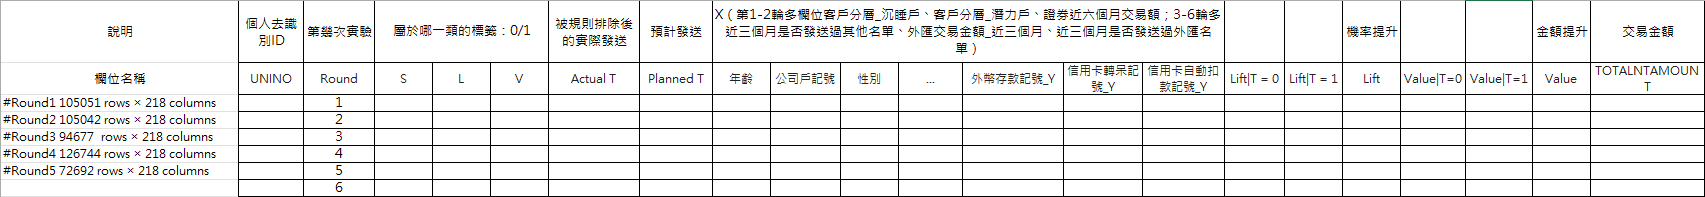

資料格式：
UNINO | Round | S | L | V | Actual T | Planned T |年齡| 公司戶記號 | 性別|	...	|外幣存款記號_Y | 信用卡轉呆記號_Y | 信用卡自動扣款記號_Y	| Lift|T = 0 |	Lift|T = 1| Lift |	Value|T=0 |	Value|T=1	| Value	| TOTALNTAMOUNT|

* #Round1 105051 rows × 218 columns
* Round2 103836 rows × 218 columns
* Round3 94677  rows × 218 columns
* Round4 126735 rows × 218 columns
* Round5 72692 rows × 218 columns
* Round6 93980 rows × 218 columns

In [2]:
import pandas as pd
import numpy as np
Concat = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv')
Concat['Round'] = Concat['Round'].astype(int)
Concat['S'] = Concat['S'].astype(int)
Concat['L'] = Concat['L'].astype(int)
Concat['V'] = Concat['V'].astype(int)
Concat['TOTALNTAMOUNT'] = Concat['TOTALNTAMOUNT'].fillna(0)
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595623,Z1222491340,6,0,1,0,1,1,28,0,1.0,...,1,0,1,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357,3000.0
595624,Z1222500670,6,1,0,0,1,1,51,0,1.0,...,1,0,0,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216,0.0
595625,Z1222600580,6,0,1,0,0,0,53,0,1.0,...,1,0,0,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170,0.0
595626,Z1229700050,6,0,1,0,1,1,47,0,1.0,...,1,0,1,0.009360,0.011606,0.002245,616308.701338,655115.291744,38806.590406,0.0


In [ ]:
# Group by 'UNINO' and 'Round', and sum 'TOTALNTAMOUNT'
summed_df = Concat.groupby(['UNINO', 'Round'], as_index=False)['TOTALNTAMOUNT'].sum()

# Drop duplicates based on 'UNINO' and 'Round'
unique_df = Concat.drop_duplicates(subset=['UNINO', 'Round'])

# Merge the summed values back into the DataFrame without duplicates
Concat= pd.merge(unique_df.iloc[:,:-1], summed_df, on=['UNINO', 'Round'], how='left')
Concat

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
0,A1220046320,1,1,0,1,0,0,73,0,1.0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595623,Z1222491340,6,0,1,0,1,1,28,0,1.0,...,True,False,True,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357,0.0
595624,Z1222500670,6,1,0,0,1,1,51,0,1.0,...,True,False,False,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216,0.0
595625,Z1222600580,6,0,1,0,0,0,53,0,1.0,...,True,False,False,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170,0.0
595626,Z1229700050,6,0,1,0,1,1,47,0,1.0,...,True,False,True,0.009360,0.011606,0.002245,616308.701338,655115.291744,38806.590406,0.0


In [ ]:
#Rounds 1-6 總共不重複的treatment & control個別有多少顧客?
# Initialize a dictionary to hold lengths for each round
lengths_by_round = {}

# Loop through each round from 1 to 6
for round_num in range(1, 7):
    # Filter rows for the current round where 'Actual T' == '1'
    filtered_df = Concat[(Concat['Round'] == round_num)]

    # Calculate lengths of strings in 'Actual T' for the filtered rows
    lengths =  len(filtered_df[filtered_df['Actual T'] == 1]), len(filtered_df[filtered_df['Actual T'] == 0])

    # Store the lengths in the dictionary
    lengths_by_round[round_num] = lengths

# Print the lengths for each round
lengths_by_round

{1: (44505, 59203),
 2: (44898, 58938),
 3: (40592, 54085),
 4: (56764, 69971),
 5: (31776, 40916),
 6: (32168, 61812)}

In [ ]:
#Rounds 1-6 總共不重複的treatment & control個別有多少顧客?
grouped_sum = Concat.groupby('UNINO')['Actual T'].sum()

# Count UNINOs with sum of 'Actual T' > 0
count_greater_than_zero = (grouped_sum > 0).sum()

# Count UNINOs with sum of 'Actual T' == 0
count_equal_to_zero = (grouped_sum == 0).sum()
print("Number of all people:", len(Concat['UNINO'].unique()))
print("Number of Treatment:", count_greater_than_zero)
print("Number of Control", count_equal_to_zero)

Number of all people: 208238
Number of Treatment: 131186
Number of Control 77052


In [ ]:
#有多少人收到1次、2次、3次....6次 treatment?
# Group by 'ID' and count the number of times 'Actual T' is 1 for each person
actual_t_counts = Concat.groupby('UNINO')['Actual T'].sum()
count_df = actual_t_counts.value_counts().reset_index().sort_values('Actual T', ascending=False)
count_df

,Actual T,count
6,6,352
5,5,2667
4,4,9333
3,3,20854
2,2,37382
1,1,60598
0,0,77052


In [ ]:
#假設(1)裡面不重複的treatment有XT人次， (2)裡面不重複的control有XC人次，
#我們能組出資料集，裡面有XT人次和XC人次在這6個實驗月份每一round的X & Y (Deal or Value)嗎? 這樣子的資料集大小會變成 XT6 + XC6個rows
T = set(grouped_sum[grouped_sum > 0].index)
C = set(grouped_sum[grouped_sum == 0].index)
#Concat[Concat.UNINO.isin(T)] #366367
#Concat[Concat.UNINO.isin(C)] #130432
pd.concat([Concat[Concat.UNINO.isin(T)], Concat[Concat.UNINO.isin(C)]], axis = 0)

,UNINO,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
1,A1221949610,1,1,0,1,1,1,75,0,1.0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
2,A1224193120,1,1,1,1,1,1,71,0,1.0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
3,A1228308980,1,1,1,1,1,1,87,0,1.0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
4,A1228865070,1,1,0,1,1,1,73,0,1.0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
7,A1235450040,1,1,0,1,1,1,67,0,1.0,...,0,0,1,0.004525,0.029706,0.010257,763.606698,4721.470205,686.580980,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595602,Y1729603520,6,0,0,1,0,0,54,0,1.0,...,False,False,True,0.000575,0.000728,0.000153,627027.063973,715336.143930,88309.079958,0.0
595605,Y2721230310,6,1,0,0,0,1,50,0,2.0,...,True,False,False,0.000107,0.000136,0.000029,767832.163510,800149.115196,32316.951686,0.0
595610,Y2723135760,6,1,0,0,0,0,49,0,2.0,...,True,False,False,0.002125,0.002702,0.000577,498826.515111,547736.125008,48909.609897,0.0
595611,Y2725583540,6,0,1,0,0,1,52,0,2.0,...,True,False,False,0.013685,0.016983,0.003298,588677.193929,633900.966194,45223.772266,0.0


##測試正確

In [3]:
import pandas as pd
import numpy as np
Concat = pd.read_csv('/content/drive/MyDrive/Sinopac/Results/Final_results.csv', index_col = 0)
Concat['Round'] = Concat['Round'].astype(int)
Concat['S'] = Concat['S'].astype(int)
Concat['L'] = Concat['L'].astype(int)
Concat['V'] = Concat['V'].astype(int)
Concat['TOTALNTAMOUNT'] = Concat['TOTALNTAMOUNT'].fillna(0)
Concat

,Round,S,L,V,Actual T,Planned T,年齡,公司戶記號,性別,呆帳記號_含信用卡,...,外幣存款記號_Y,信用卡轉呆記號_Y,信用卡自動扣款記號_Y,Lift|T = 0,Lift|T = 1,Lift,Value|T=0,Value|T=1,Value,TOTALNTAMOUNT
UNINO,,,,,,,,,,,,,,,,,,,,,
A1220046320,1,1,0,1,0,0,73,0,1.0,0,...,0,0,0,0.004380,0.034457,0.014286,761.894511,4448.653440,1169.035823,0.0
A1221949610,1,1,0,1,1,1,75,0,1.0,0,...,0,0,1,0.005012,0.030657,0.010935,798.304563,4460.122564,712.987875,0.0
A1224193120,1,1,1,1,1,1,71,0,1.0,0,...,1,0,1,0.005652,0.035673,0.038840,801.189474,4401.355675,670.351594,0.0
A1228308980,1,1,1,1,1,1,87,0,1.0,0,...,1,0,1,0.006020,0.036407,0.036564,1547.620644,7787.359599,33852.645364,0.0
A1228865070,1,1,0,1,1,1,73,0,1.0,0,...,0,0,0,0.004124,0.036939,0.008140,689.024418,5509.028624,625.983806,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Z1222491340,6,0,1,0,1,1,28,0,1.0,0,...,1,0,1,0.028412,0.035122,0.006710,612325.622942,659294.171300,46968.548357,3000.0
Z1222500670,6,1,0,0,1,1,51,0,1.0,0,...,1,0,0,0.001484,0.001881,0.000396,724983.225369,774122.983586,49139.758216,0.0
Z1222600580,6,0,1,0,0,0,53,0,1.0,0,...,1,0,0,0.017821,0.022085,0.004264,616811.317254,686973.660424,70162.343170,0.0


In [3]:
#交易金額確認
Concat.pivot_table(index=['Round', 'S', 'L', 'V'], values= 'TOTALNTAMOUNT', aggfunc=['sum', 'mean', 'max', 'min', 'count'])

sum          mean           max           min  \
            TOTALNTAMOUNT TOTALNTAMOUNT TOTALNTAMOUNT TOTALNTAMOUNT   
Round S L V                                                           
1     0 0 1    20118422.0    860.902135     3022469.0           0.0   
        1 0    13498591.0    427.021954     1932330.0           0.0   
          1    13361506.0   4076.115314     1661333.0           0.0   
      1 0 0    54030359.0   3940.945222    17474509.0           0.0   
          1    40952970.0   2298.791468     3004425.0           0.0   
        1 0    34394299.0   4400.498849     2895847.0           0.0   
          1    36216878.0   5928.446227      999998.0           0.0   
2     0 0 1     4106939.0    403.749410     1875480.0           0.0   
        1 0     4469243.0    223.383966      700000.0           0.0   
          1      755302.0   1220.197092      420000.0           0.0   
      1 0 0    66645146.0   2092.403567     6198300.0           0.0   
          1    35847318.0   1692.507932     3999998.0           0.0   
        1 0    38298203.0   3024.417831     1497000.0           0.0   
          1    41585454.0   5662.507353     2380495.0           0.0   
3     0 0 1      284065.0     60.413654      100000.0           0.0   
        1 0      710453.0     48.462005      150000.0           0.0   
          1      555883.0   1429.005141      157040.0           0.0   
      1 0 0    22874364.0    452.357545     2213945.0           0.0   
          1    22613702.0   3787.889782     1363084.0           0.0   
        1 0    17655525.0   1200.729393     3259969.0           0.0   
          1    24077017.0   6533.790231     2193561.0           0.0   
4     0 0 1     9870103.0    271.567011     1999999.0           0.0   
        1 0     1491361.0    160.292455      320000.0           0.0   
          1     6469367.0    945.952186     1301851.0           0.0   
      1 0 0    46564770.0   2176.228911     3891298.0           0.0   
          1    60165736.0   1763.046826     5280000.0           0.0   
        1 0    43189877.0   7213.943043     3909499.0           0.0   
          1    59038731.0   4635.214807     7666000.0           0.0   
5     0 0 1      334437.0     97.560385      139835.0           0.0   
        1 0     1104125.0    316.913031      150000.0           0.0   
          1           0.0      0.000000           0.0           0.0   
      1 0 0   181980260.0   2990.636976     5351445.0           0.0   
          1    11455765.0   3748.614202     1985882.0           0.0   
        1 0     2887953.0   1542.709936      447890.0           0.0   
          1           0.0      0.000000           0.0           0.0   
6     0 0 1     8054098.0    260.954445     1388541.0           0.0   
        1 0   152011762.0   4925.212610    11999994.0           0.0   
          1    14593692.0   9961.564505     2191893.0           0.0   
      1 0 0    21499688.0    698.336571     1614478.0           0.0   

                    count  
            TOTALNTAMOUNT  
Round S L V                
1     0 0 1         23369  
        1 0         31611  
          1          3278  
      1 0 0         13710  
          1         17815  
        1 0          7816  
          1          6109  
2     0 0 1         10172  
        1 0         20007  
          1           619  
      1 0 0         31851  
          1         21180  
        1 0         12663  
          1          7344  
3     0 0 1          4702  
        1 0         14660  
          1           389  
      1 0 0         50567  
          1          5970  
        1 0         14704  
          1          3685  
4     0 0 1         36345  
        1 0          9304  
          1          6839  
      1 0 0         21397  
          1         34126  
        1 0          5987  
          1         12737  
5     0 0 1          3428  
        1 0          3484  
          1             1  
      1 0 0         60850  
          1          3056  
        1 0          1872  
   

In [4]:
#標籤數量
Concat.pivot_table(index=['S', 'L', 'V'], columns= ['Round'], values = ['TOTALNTAMOUNT'], aggfunc=['count'])

count                                             
      TOTALNTAMOUNT                                             
Round             1        2        3        4        5        6
S L V                                                           
0 0 1       23369.0  10172.0   4702.0  36345.0   3428.0  30864.0
  1 0       31611.0  20007.0  14660.0   9304.0   3484.0  30864.0
    1        3278.0    619.0    389.0   6839.0      1.0   1465.0
1 0 0       13710.0  31851.0  50567.0  21397.0  60850.0  30787.0
    1       17815.0  21180.0   5970.0  34126.0   3056.0      NaN
  1 0        7816.0  12663.0  14704.0   5987.0   1872.0      NaN
    1        6109.0   7344.0   3685.0  12737.0      1.0      NaN

In [5]:
#預測值確認
df = Concat[Concat['Round'] == 5]
print(len(df[round(df['Lift|T = 1']-df['Lift|T = 0'] - df['Lift'], 6)== 0.0]))
print(len(df[round(df['Value|T=1']-df['Value|T=0'] - df['Value'], 6)== 0.0]))
df = Concat[Concat['Round'] == 6]
print(len(df[round(df['Lift|T = 1']-df['Lift|T = 0'] - df['Lift'], 6)== 0.0]))
print(len(df[round(df['Value|T=1']-df['Value|T=0'] - df['Value'], 6)== 0.0]))

72692
72692
93980
93980
